In [44]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2
import time
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import tensorflow  as tf
from joblib import dump, load
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3, linewidth=120)

In [3]:
def plot_loss(history, name):
    _ = plt.figure(figsize=(13.5, 7.5))
    plt.plot(history.history['loss'], label='Train Loss-' + name)
    plt.plot(history.history['val_loss'], label='Test Loss' + name)
    plt.ylabel("Error")
    plt.xlabel("Epochs")
    plt.legend()
    plt.title("Train- test Erros for " + name)
    plt.show()
    


def plot_predictions(y_test, y_pred, name):
    _ = plt.figure(figsize=(13.5, 7.5))
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values ("+ name+")")
    plt.ylabel("True Values ("+ name+")")
    plt.title("Scatter plot of target values vs predicted values")
    


def plot_error_distribution(y_test, y_pred, name, n_bins):
    error = y_pred - y_test
    plt.hist(error, bins=n_bins)
    plt.xlabel("Prediction Error (" + name + ")")
    plt.ylabel('Count')
    

In [4]:
def mae(y_trues, y_preds):
    return np.mean(np.abs(y_trues-y_preds))

def rmse(y_trues, y_preds):
    return np.sqrt(np.mean(np.power(y_trues-y_preds, 2)))

def mrae(y_trues, y_preds):
    return np.mean(np.abs(np.divide(y_trues -y_preds, y_trues)))

In [5]:
pld_complete_range = pd.read_csv("../../data/pld_complete_range.csv", index_col=False)
pld_complete = catalog.load('pld_complete').dropna().sort_values('pos', ascending=True)

2021-02-15 15:56:14,239 - kedro.io.data_catalog - INFO - Loading data from `pld_complete` (ParquetDataSet)...
2021-02-15 15:56:14,528 - numexpr.utils - INFO - NumExpr defaulting to 4 threads.


In [6]:
pld_complete_range.head()

,median_Voltage_HSR_V_1025,median_Voltage_HSR_V_1027,median_Voltage_HSR_V_1030,median_Voltage_HSL_V_1025,median_Voltage_HSL_V_1027,median_Voltage_HSL_V_1030,median_Voltage_HF_V_1025,median_Voltage_HF_V_1027,median_Voltage_HF_V_1030,median_Voltage_HC_V_1025,...,std_Sigma_1030,pos,Speed,X FWHM,Y FWHM,R FWHM,Coolness,Coolness_neg,Ic,Ic_norm
0,0.129479,0.177414,0.005142,0.69562,-0.256257,-0.015406,-0.009215,-0.072807,-0.021102,0.057123,...,-0.390667,-0.501695,0.009841,0.039589,0.067470,0.015697,0.053006,-0.086369,496.2,1.767913
1,0.110059,0.340245,0.005142,0.69562,-0.321465,-0.015406,-0.009215,-0.173901,-0.021102,0.050178,...,-0.390667,-0.501652,-0.005266,0.039589,0.067470,0.015697,0.053006,-0.086369,494.7,1.762568
2,0.119769,0.340245,0.005142,0.69562,-0.321465,-0.015406,-0.007363,-0.173901,-0.021102,0.057123,...,-0.390667,-0.501646,-0.007197,0.039589,0.067470,0.015697,0.053006,-0.086369,494.2,1.760787
3,0.110059,0.348139,0.005142,0.69562,-0.322354,-0.015406,-0.009215,-0.218270,-0.021102,0.057123,...,-0.390667,-0.501635,-0.010946,0.039589,0.067470,0.015697,0.053006,-0.086369,495.5,1.765419
4,0.110059,0.264593,0.005142,0.69562,-0.305820,-0.015406,-0.009215,-0.129533,-0.021102,0.057123,...,-0.390667,-0.501619,-0.017147,0.042682,0.069442,0.017956,0.051965,-0.084836,497.9,1.773168


In [7]:
x_r = pld_complete_range.loc[:, pld_complete_range.columns.isin(['Ic', 'Coolness'])]  # .to_numpy()
y = pld_complete_range['pos']  # .to_numpy()

pos = pld_complete_range['pos']  # .to_numpy()
ic_norm = pld_complete_range['Ic_norm']
ic = pld_complete_range['Ic']

coolness = pld_complete_range['Coolness']
x_r.shape, y.shape, pos.shape

((18561, 2), (18561,), (18561,))

In [8]:
x_r_train, x_r_test, y_train, y_test = train_test_split(x_r, y,
                                                        test_size=0.40,
                                                        random_state=43,)

x_r_val, x_r_test, y_val, y_test = train_test_split(x_r_test, y_test,
                                                        test_size=0.5,
                                                        random_state=43,)


x_r_train.shape, x_r_test.shape, x_r_val.shape, y_train.shape, y_test.shape, y_val.shape

((11136, 2), (3713, 2), (3712, 2), (11136,), (3713,), (3712,))

In [9]:
set(x_r.iloc[:, 1] == ic), set(x_r.iloc[:, 0] == coolness)

({True}, {True})

In [10]:
set(x_r.loc[:, 'Ic'] == ic), set(x_r.loc[:, 'Coolness'] == coolness)

({True}, {True})

In [11]:
x_r_train, x_r_test, y_train, y_test = train_test_split(x_r, y,
                                                        test_size=0.25,
                                                        random_state=43,)

x_r_train.shape, x_r_test.shape, y_train.shape, y_test.shape

((13920, 2), (4641, 2), (13920,), (4641,))

# The Purpose of this study : 

Let us start with the notation:

**Notation:**

Let $D = \{f^{1}_{j}, f^{2}_{j}, ..., p_{j}, c_{j}, i_{j}, f^{M}_{j} \}_{j=1}^{N}$ be our data set. 
Where $N$ represents the number of observations and $M$ represent the number of features (the superscripts represent  the feature indices).
Among all of the features, we are going to focus on three specific features, that is, position $p_j$, coolness $c_j$, critical current $i_j$. (This is why we represent them with different letters than f).

The goal is to match the "coolnesses", the "positions" and the "critical currents" such that for a given $p_j:$ $\frac{c_j}{i_j} \approx constant$


Based on the two following assumptions there would be two possibilities for matching :

1. correlated positions assumption: in this situation we assume that in the current version of data set, there is a correlation between these three features (pos, i_c, cool) --which is to be discovered.

    Concretely, for any $ j$ there exists a $x_j$ such that $p_j \times x_j \approx \frac{i_j}{c_j} = r_j$. 
    Thus, the $x_j$'s can be explained as parameters of a function as follows.
   In other words, there should be a function $F_\phi(i_j, c_j) \approx p_j$ where $\phi$ represent the model parameters to be estimated: such that $x_j \sim \phi$.

    Clearly, the aforementioned case can be treated as a supervised learning problem s.t the position would be the target value and the two remaining items would be the training features.

2. uncorrelated positions assumption: In this situation, we assume that in the current version of data set, there is no correlation between the position's values ($p_j$) and the values of coolness ($c_j$) and critical current ($i_j$).

    Thus the task under this assumption can be solved by applying a greedy search algorithm: to find $p_j$ minimizing $r_{jk}$ as follows. 
    
    -specify a condition, say the ratio between coolness and critical should be minimized.
    
        - Here we define this condition to be the $r_{jk}$ to be minimized.
        - A more complicated condition can be also defined -- though I think some knowledge from the process is needed in this regard. 
        
    \begin{equation}
    \underset{k=1, ..., N}{\operatorname{argmin}} r_{jk}=\frac{i_j}{c_{k}}  \ \ \  j=1, ..., N
    \label{search_k}
    \end{equation}

    That is, any observation $j$ we fix its critical current and its position and then we will find that $c_k$ which the value $r_{jk}$ is minimized(maximized). Ties should be broken randomly (all taken into account at the same time). 
    
    With this setting, we match positions, critical currents and the coolnesses w.r.t to a pre-specified condition.


**Andrey**

Will reply here, since I can write latex

Very much like the second option, as I understand it.


With a bit different description:

In ideal alignment, there is a dependence $I = f(C) + \varepsilon$

When we have distorted alignment, $I\{p_i^I\}$ and $C\{p_j^C\}$ are values of I and C 
known at positions $\{p_i^I\}$ and $\{p_j^C\}$

The task is to find a transformation $\{p_j^C\} \rightarrow^T \{p_j^*\}$ such, that

$$\sum_i |\frac{I\{p_i^I\}}{f(C^*\{p_i^I\})}| \rightarrow min ,$$
    
where $C^*\{p_i^I\}$ are the interpolations of $C\{p_j^*\}$ (values of $C$ are same, but only $p$'s are transformed) at points $\{p_i^I\}$


- f: Ic = A*(100-coolness) + B

A: coeff. depend on $p_{i}$


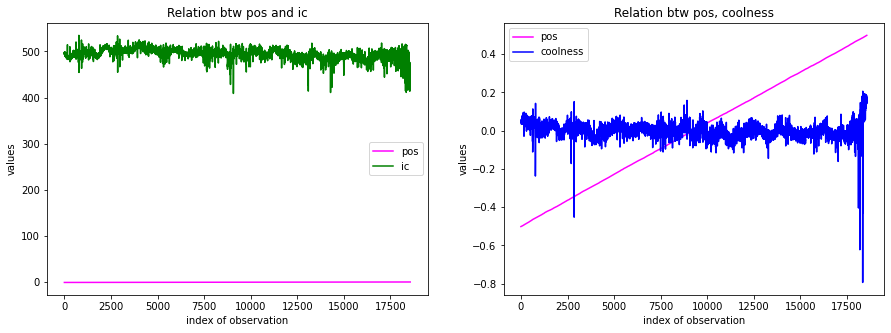

In [12]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(pos, 'magenta', label='pos')
# ax.plot(coolness, 'blue', label='coolness')
ax.plot(ic, 'green', label='ic')
ax.set_xlabel('index of observation')
ax.set_ylabel('values')
ax.set_title('Relation btw pos and ic')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.plot(pos, 'magenta', label='pos')
ax.plot(coolness, 'blue', label='coolness')
# ax.plot(ic_norm, 'green', label='ic_norm')
ax.set_xlabel('index of observation')
ax.set_ylabel('values')
ax.set_title('Relation btw pos, coolness')
ax.legend()

plt.show()

In [13]:
class SetsAligner(tf.keras.Model):
    
    def __init__(self, n_units, n_features, name='sets_aligner', **kwargs):
        super(SetsAligner, self).__init__(name=name, **kwargs)
        self.n_units = n_units
        self.n_features = n_features 
        self.dense_1 = tf.keras.layers.Dense(units=self.n_units, activation='relu', 
                                            input_shape=(self.n_features,))
        self.dense_2 = tf.keras.layers.Dense(units=self.n_units, activation='relu')
        self.predictions = tf.keras.layers.Dense(units=1, activation='linear')
        
    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        predictions = self.predictions(x)
        return predictions



In [20]:
n_units = 20

sets_aligner_model = SetsAligner(n_units=n_units, n_features=x_r.shape[1])


In [31]:
n_epochs = 5
learning_rate = 0.001
batch_size=256

sets_aligner_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                           loss=tf.keras.losses.MeanSquaredError())

In [32]:
%%time

history = sets_aligner_model.fit(x=x_r_train, y=y_train,
                                validation_data=(x_r_val, y_val), 
                                epochs=n_epochs,
                                batch_size=batch_size)

Epoch 1/5
55/55 [==============================] - 0s 3ms/step - loss: 2.0518 - val_loss: 0.1414
Epoch 2/5
55/55 [==============================] - 0s 2ms/step - loss: 0.0875 - val_loss: 0.0813
Epoch 3/5
55/55 [==============================] - 0s 2ms/step - loss: 0.0828 - val_loss: 0.0786
Epoch 4/5
55/55 [==============================] - 0s 2ms/step - loss: 0.0832 - val_loss: 0.0790
Epoch 5/5
55/55 [==============================] - 0s 2ms/step - loss: 0.0824 - val_loss: 0.0796
CPU times: user 1.23 s, sys: 71.7 ms, total: 1.3 s
Wall time: 1.08 s


In [33]:
sets_aligner_model.summary()

Model: "sets_aligner"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  60        
_________________________________________________________________
dense_4 (Dense)              multiple                  420       
_________________________________________________________________
dense_5 (Dense)              multiple                  21        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


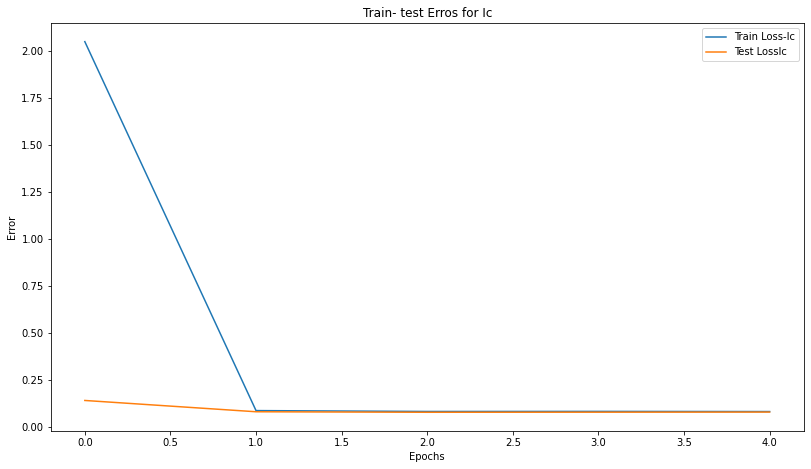

In [34]:
plot_loss(history=history, name='Ic')

In [42]:
y_hat[:, 0].shape, y_test.shape

((4641,), (4641,))

In [43]:
y_hat = sets_aligner_model.predict(x_r_test)[:, 0]


mae_ic = mae(y_trues=y_test, y_preds=y_hat)
rmse_ic = rmse(y_trues=y_test, y_preds=y_hat)
mrae_ic = mrae(y_trues=y_test, y_preds=y_hat)

print("DNN-Regression Performance for Ic:", 
     "MAE: %.3f" % mae_ic, 
      "RMSE: %.3f" % rmse_ic, 
      "MRAE: %.3f" % mrae_ic,)

DNN-Regression Performance for Ic: MAE: 0.243 RMSE: 0.283 MRAE: 1.515
